### convert event number to flux with mu2flux ###

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
data_sens={'DMstacking':[32.44,22.7, 17.3],'DMsingle':[14.42,11.82,7.05],'PLstacking':[11.9,12.6,np.nan],'PLsingle':[5.41,4.89,np.nan]}
data_3dp={'DMstacking':[69.07,37.2, 22.3],'DMsingle':[57.20,34.82,23.36],'PLstacking':[15.89,14.1,np.nan],'PLsingle':[np.nan,np.nan,np.nan]}
data_5dp={'DMstacking':[np.nan,np.nan,np.nan],'DMsingle':[np.nan,np.nan,np.nan],'PLstacking':[28.37,27.8,np.nan],'PLsingle':[np.nan,np.nan,np.nan]}

In [59]:
frame_sens=pd.DataFrame(data=data_sens,index=['100GeV','1TeV','10TeV']) 
frame_3dp=pd.DataFrame(data=data_3dp,index=['100GeV','1TeV','10TeV'])
frame_5dp=pd.DataFrame(data=data_5dp,index=['100GeV','1TeV','10TeV'])

In [60]:
frame_sens

,DMstacking,DMsingle,PLstacking,PLsingle
100GeV,32.44,14.42,11.9,15.41
1TeV,22.70,11.82,12.6,4.89
10TeV,17.30,7.05,NaN,NaN


### please refer to /analyses/dm_analysis_test_NorthernTracks.ipynb for conversion ###

In [61]:
def mu2flux_input(energy, case):
    return np.asarray([frame_sens[case][energy],frame_3dp[case][energy],frame_5dp[case][energy]])

In [62]:
mu2flux_input('1TeV','PLstacking')

array([12.6, 14.1, 27.8])

In [63]:
pl_sens_NTS=np.asarray([8.014587297573466e-16,8.968704832998878e-16,1.7682978323217647e-15])

In [64]:
mu2flux_input('100GeV','PLstacking')

array([11.9 , 15.89, 28.37])

In [39]:
pl_sens_OSN=np.asarray([7.77109326831913e-20,1.037669512887319e-19,1.852654756489191e-19])

### plot pl sens ###

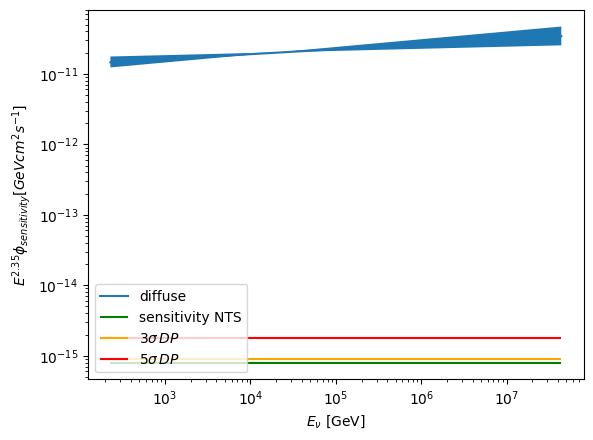

In [72]:
min_energy_5,min_energy_95=2.3599377,7.639023 #from 5% and 95% percentile convention of energy dirtibution
E=np.logspace(min_energy_5,min_energy_95,30)
bestfit_index=2.35
plt.plot(E, E**bestfit_index * 1.44e-18 * (E/1e3)**(-2.28),label='diffuse')
plt.fill_between(E, y1=E**bestfit_index * 1.29e-18 * (E/1e3)**(-2.24), y2=E**bestfit_index * 1.64e-18 * (E/1e3)**(-2.32) )
plt.hlines(y=pl_sens_NTS[0], xmin=10**(min_energy_5), xmax=10**(min_energy_95),label=r'sensitivity NTS',color='green',linestyle='solid')
plt.hlines(y=pl_sens_NTS[1], xmin=10**(min_energy_5), xmax=10**(min_energy_95),label=r'$3 \sigma\, DP$',color='orange',linestyle='solid')
plt.hlines(y=pl_sens_NTS[2], xmin=10**(min_energy_5), xmax=10**(min_energy_95),label=r'$5 \sigma\, DP$',color='red',linestyle='solid')

# plt.hlines(y=pl_sens_OSN[0], xmin=20, xmax=300,label=r'sensitivity OSN',color='green',linestyle='dashed')
# plt.hlines(y=pl_sens_OSN[1], xmin=20, xmax=300,label=r'$3 \sigma\, DP$',color='orange',linestyle='dashed')
# plt.hlines(y=pl_sens_OSN[2], xmin=20, xmax=300,label=r'$5 \sigma\, DP$',color='red',linestyle='dashed')
plt.xlabel(r'$E_{\nu}$ [GeV]')
plt.ylabel(r'$E^{2.35} \phi_{sensitivity} [GeV cm^2 s^{-1}]$')
plt.xscale('log')
plt.yscale('log')
plt.legend()

### J-factor and other parameters ###

In [73]:
from astropy import constants as c
from astropy import units as u
from astropy.cosmology import WMAP9

In [74]:
frame_sens['DMstacking']

100GeV    32.44
1TeV      22.70
10TeV     17.30
Name: DMstacking, dtype: float64

In [154]:
dm_sens=np.asarray([3.2121326787552977e-13,2.6546662106578153e-15,1.8576116825503208e-16])*((u.cm)**(-2) *(u.s)**(-1))
dm_mass=[100*u.GeV, 1*u.TeV, 10*u.TeV]
sigmav_standard=5.71e-25*(u.cm**3 * u.s**(-1))

In [202]:
def calculate_sigmav(sens, mass):
    
    #load data from source list
    dm_sources_more_info=pd.read_csv('../sources/dm_sources_info.csv', header=0,index_col=0) 
    
    # calculate total effective J
    J_i=dm_sources_more_info['J_estimate']
    d_i=WMAP9.comoving_distance(dm_sources_more_info['z'])
    scale=((100*u.kpc/d_i).decompose())**2
    J_total=np.sum(J_i* scale)
    J_total_with_unit=J_total*((u.GeV)**2 / (u.cm)**5)
    print(J_total_with_unit)

    #calculate sigmav
    sigmav=[]
    for i in [0,1,2]:
        sigmav_i= (dm_sens[i]*(dm_mass[i]**2)*8*np.pi/J_total_with_unit)
        sigmav_i_value = sigmav_i.decompose().to(u.cm**3 * u.s**(-1))
        print(sigmav_i_value)
        sigmav.append(sigmav_i_value.value)
    return np.asarray(sigmav)

In [203]:
sigmav=calculate_sigmav(dm_sens,dm_mass)

1.0153122197474811e+18 GeV2 / cm5
7.951219126225536e-26 cm3 / s
6.57128296335081e-26 cm3 / s
4.598277536006886e-25 cm3 / s


### plot dm sens ###

In [204]:
sigmav=calculate_sigmav(dm_sens,dm_mass)

1.0153122197474811e+18 GeV2 / cm5
7.951219126225536e-26 cm3 / s
6.57128296335081e-26 cm3 / s
4.598277536006886e-25 cm3 / s


In [210]:
sigmav_NFW=sigmav.copy()*1e4
sigmav_Burkert=sigmav_NFW/10
relic=0.5e-25
#dwarfs_analysis
dwarfs_NST=[0.21e-21,  0.13e-21, 0.12e-21,   0.11e-21, 0.12e-21, 0.14e-21, 0.15e-21]
energy=[1000,2000,3000,4000, 5000, 8000, 10000] #in GeV

#yerr=np.asarray([0.7e-25,0.7e-25,0.7e-25])

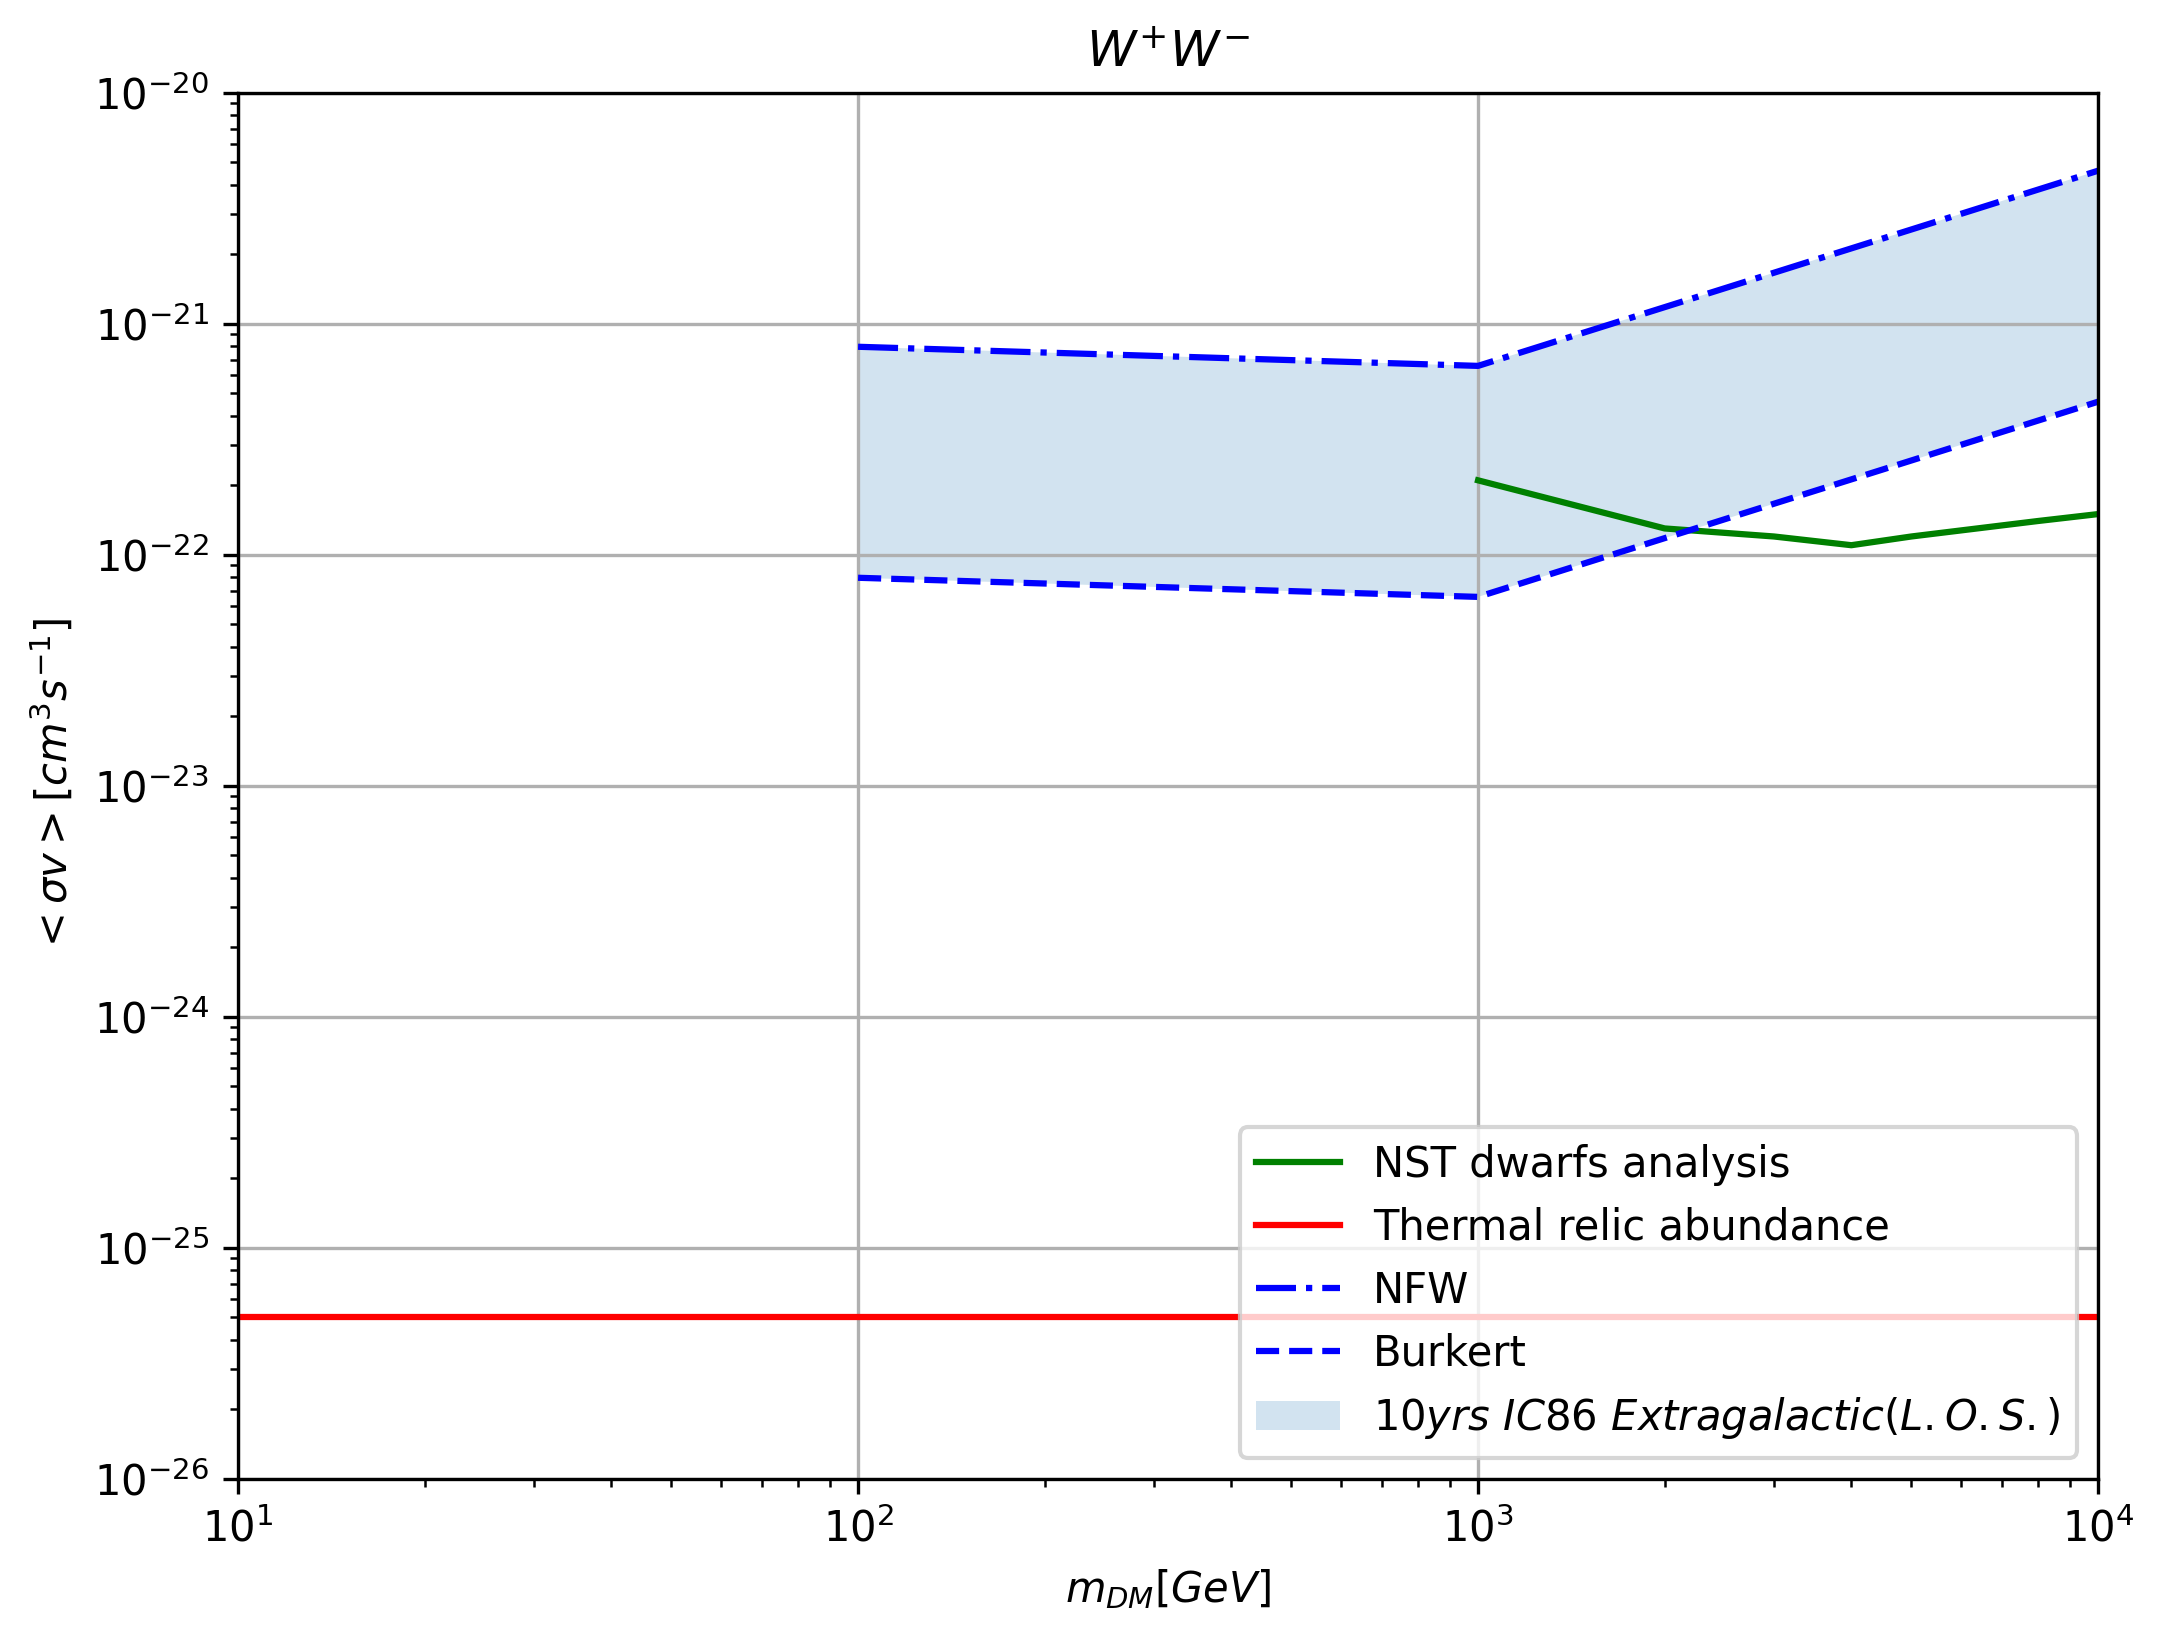

In [211]:
plt.figure(figsize=(8,6),dpi=300)
plt.plot(energy,dwarfs_NST,label='NST dwarfs analysis',color='green')
#plt.plot(np.logspace(2,4,len(data_8y)),data_8y,label='8yrs DeepCore GC analysis',color='orange')
plt.plot(np.linspace(0.1,1e4,20),np.repeat(relic,(20,)),color='red',label='Thermal relic abundance')
#plt.text(120,1.2e-25,'IceCube Working',color='grey')
#plt.text(140,0.6e-25,'in Progress',color='grey')


#plt.plot(np.logspace(2,4,3),data_11y_NFW,color='blue',linestyle='--')
plt.plot(np.logspace(2,4,3),sigmav_NFW,color='blue',linestyle='-.',label='NFW')
#plt.errorbar(np.logspace(2,4,3), data_11y_NFW, 1.1*data_11y_NFW,label='10yrs IC86 Extragalactic ')
#plt.fill_between(np.logspace(2,4,3), data_11y_NFW, data_11y_Burkert, alpha=0.3,label=r'$10yrs\,IC86\,Extragalactic(d^2)$')
#plt.plot(np.logspace(2,4,3),data_11y_Burkert,color='blue',linestyle='--')
plt.plot(np.logspace(2,4,3),sigmav_Burkert,color='blue',linestyle='--',label='Burkert')
#plt.errorbar(np.logspace(2,4,3), data_11y_Burkert, 1.1*data_11y_Burkert)
plt.fill_between(np.logspace(2,4,3), sigmav_NFW, sigmav_Burkert, alpha=0.2,label=r'$10yrs\,\,IC86\,\,Extragalactic(L.O.S.)$')

plt.ylabel(r'$< \sigma v > [{cm}^3{s}^{-1}]$')
plt.xlabel(r'$m_{DM} [GeV]$')
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-26,1e-20])
plt.xlim([10,1e4])
plt.grid()
plt.title(r'$W^{+}W^{-}$')
plt.legend(loc='lower right')